# Finding a home in the Northeastern United States

Import the csv from Kaggle by downloading it to your google drive, store in 'MyDrive', and run code below.
*   You will have to allow Google Collab to connect with your Google Drive

In [2]:
# import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
# load data in from google drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/realtor-data.csv"
real_estate_rawdata = pd.read_csv(path)
real_estate_rawdata.head()

Mounted at /content/drive


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


# SECTION 1: The Data

Data Dictionary:

| Feature Name | Description | Data Types |
| ------------ | ---------- | --- |
| status | _For sale or not_ | string |
| price | _Selling price in dollars_ | float |
| bed | _Number of bedrooms_ | float | 
| bath | _Number of bathrooms_ | float |
| acre_lot | _Acreage of property_ | float |
| address | _Full address of property_ | string |
| street | _Street of property_ | string |
| city | _City of property_ | string |
| state | _State of property_ | string |
| zip_code | _Zipcode of property_ | float |
| house_size | _Square footage of property_ | float | 
|sold_date | _Date of property sale_ | string |

Assumtions:
*   We assume that 'house_size' is the square footage of the property.

Changes to the data:
*   Most the data types did not have to be changed
*   We removed all duplicates by 'full_address'
*   We replaced missing values with the series average in the following series:
      *   'price'
      *   'bed'
      *   'bath'
      *   'acre_lot'
      *   'house_size'
*   We removed the outliers using the IQR method
      *    Meaning we calculated the lower and upper quantiles
      *    Determined the IQR, Upper and Lower bounds
      *    Then for the outliers that fell outside the upper bound, were replaced with the upper bound, and any outliers below the lower bound were replaced with the lower bound. 




In [4]:
# drop dataframe duplicates by full_address
real_estate_data = real_estate_rawdata.drop_duplicates(subset= 'full_address', keep='first', ignore_index = True)

In [5]:
# checking data types
real_estate_data.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [6]:
# replace missing values with mean
# create copy of df
real_estate_data_copy = real_estate_data.copy()
# correct missing values 
real_estate_data_copy['price'] = real_estate_data_copy['price'].fillna(real_estate_data_copy['price'].mean())
real_estate_data_copy['bed'] = real_estate_data_copy['bed'].fillna(real_estate_data_copy['bed'].mean())
real_estate_data_copy['bath'] = real_estate_data_copy['bath'].fillna(real_estate_data_copy['bath'].mean())
real_estate_data_copy['acre_lot'] = real_estate_data_copy['acre_lot'].fillna(real_estate_data_copy['acre_lot'].mean())
real_estate_data_copy['house_size'] = real_estate_data_copy['house_size'].fillna(real_estate_data_copy['house_size'].mean())

In [7]:
# change 'price' from a float to an integer
real_estate_data_copy['price'].astype(int)

0          105000
1           80000
2           67000
3          145000
4           65000
           ...   
112227    1649000
112228     779000
112229    1595000
112230    4595000
112231    2995000
Name: price, Length: 112232, dtype: int64

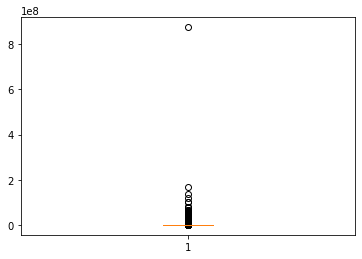

In [8]:
# show 'price' with outliers
plt.boxplot(real_estate_data_copy['price']);

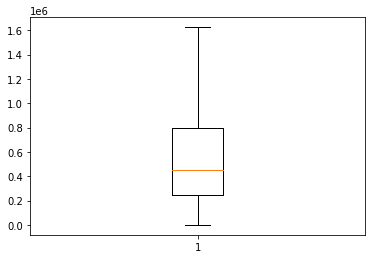

In [9]:
# show 'price' without outliers
#find the first and third quantiles using numpy
q1 =  np.quantile(real_estate_data_copy['price'], 0.25)
q3 =  np.quantile(real_estate_data_copy['price'], 0.75)

# calc iqr
iqr = q3 - q1

# calc upper and lower bounds 
bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

# replace series with new series that replaces outliers with their closest bound
real_estate_data_copy['price'] =  np.where(real_estate_data_copy['price'] > bound_up, bound_up, real_estate_data_copy['price'])
real_estate_data_copy['price'] =  np.where(real_estate_data_copy['price']< bound_low, bound_low, real_estate_data_copy['price'])

plt.boxplot(real_estate_data_copy['price']);

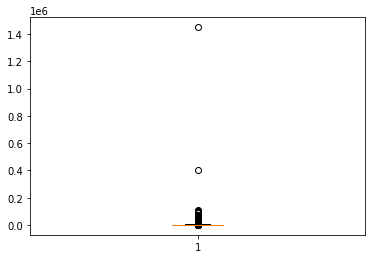

In [10]:
# square footage with outliers 
plt.boxplot(real_estate_data_copy['house_size']);

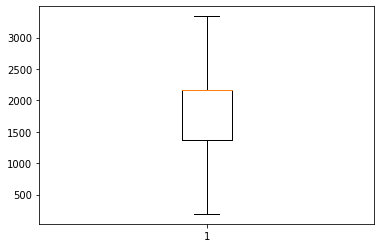

In [11]:
# square footage wihtout outliers 
# find the first and third quantiles using numpy
q1 =  np.quantile(real_estate_data_copy['house_size'], 0.25)
q3 =  np.quantile(real_estate_data_copy['house_size'], 0.75)

# calc iqr
iqr = q3 - q1

# calc upper and lower bounds 
bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

# replace series with new series that replaces outliers with their closest bound
real_estate_data_copy['house_size'] =  np.where(real_estate_data_copy['house_size'] > bound_up, bound_up, real_estate_data_copy['house_size'])
real_estate_data_copy['house_size'] =  np.where(real_estate_data_copy['house_size']< bound_low, bound_low, real_estate_data_copy['house_size'])

plt.boxplot(real_estate_data_copy['house_size']);

THE STATES


*   Due to lack of significant data the following states were removed: Geroge, South Caroline, Tennessee, Virginia, West Virigina, Wyoming. 
*   Due to lack of relevence in our analysis the following states were removed: Puerto Rico and Virgin Islands



| State Abbreviation | State | Removed | 
| ------------ | --------------- | ------------ | 
| Connecticut | CT | |
| Delaware | DE | |
| Georgia | GA | _Removed due to lack of data_ |
| Maine | ME | |
| Massachusetts | MA | |
| New Hampshire | NH | |
| New Jersey | NJ | |
| New York | NY | |
| Pennsylvania |PA | |
| Puerto Rico | PR | _Removed due irrelevance_ |
| Rhode Island |RI | |
| South Carolina | SC | _Removed due to lack of data_ |
| Tennessee | TN | _Removed due to lack of data_ |
| Vermont | VT | |
| Virgin Islands | VI | _Removed due irrelevance_ |
| Virginia | VA | _Removed due to lack of data_ |
| West Virginia | WV | _Removed due to lack of data_ |
| Wyoming | WY | _Removed due to lack of data_ |




In [12]:
# count of data in each state before removing
real_estate_data_copy['state'].value_counts()

New Jersey        32299
New York          27952
Connecticut       13776
Massachusetts     10110
Pennsylvania       9001
Maine              4986
New Hampshire      3532
Rhode Island       3409
Puerto Rico        2632
Vermont            2500
Delaware           1277
Virgin Islands      742
Virginia              7
Georgia               5
Wyoming               1
South Carolina        1
West Virginia         1
Tennessee             1
Name: state, dtype: int64

In [13]:
# removing states with lack of data
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Georgia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'South Carolina'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Tennessee'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Virginia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'West Virginia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Wyoming'], inplace = True)
# removing states with lack of relevance
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Virgin Islands'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Puerto Rico'], inplace = True)

In [14]:
# check count of data in each remaining state
real_estate_data_copy['state'].value_counts()

New Jersey       32299
New York         27952
Connecticut      13776
Massachusetts    10110
Pennsylvania      9001
Maine             4986
New Hampshire     3532
Rhode Island      3409
Vermont           2500
Delaware          1277
Name: state, dtype: int64

NEW FEATURES: We added three new features to the data.
*   Price per square foot
*   Bedroom to bathroom ratio
*   State abbreviations 



In [15]:
# calculating the price/sqft by house size
real_estate_data_copy['price_sqft'] = real_estate_data_copy['price']/real_estate_data_copy['house_size']
# calculating the bed/bath count by house
real_estate_data_copy['bed_bath_ratio'] = real_estate_data_copy['bed']/real_estate_data_copy['bath']

In [16]:
# change state names to state abbreviations
states = {
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'MA': 'Massachusetts',
        'ME': 'Maine',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NY': 'New York',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'VT': 'Vermont',}

def best_match(x):
    '''
    This function takes a state name and finds its' 
    abbreviation in the dictionary called states.

    ARGUMENTS
    ---------
     - x: (string) full name of state 
    OUTPUT
    ---------
    - the abbreviation of state x 
    '''
    # Try another way for 2-letter codes
    if len(x) == 2: # Try another way for 2-letter codes
        # Loop through each state in the states dictionary
        for a,n in states.items():
            # Check if the state name has two words
            if len(n.split()) == 2:
              # Join the first letter of each word in the state name to form a string
              # Check if this string matches the input x in a case-insensitive manner
                if "".join([c[0] for c in n.split()]).lower() == x.lower():
                    return a.lower()
    # Compile an expression using the input x
    new_rx = re.compile(r"\w*".join([ch for ch in x]), re.I)
    # Loop through each state in the states dictionary
    for a,n in states.items():
        # Check if the state name matches the regular expression
        if new_rx.match(n):
            return a.lower()
        
real_estate_data_copy['state_abbrev'] = real_estate_data_copy['state'].apply(lambda x: best_match(x)).str.upper()

Descriptive Statistics of data

In [17]:
# describe, formate as float with one decimal
real_estate_data_copy.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,price,bed,bath,acre_lot,zip_code,house_size,price_sqft,bed_bath_ratio
count,108842.0,108842.0,108842.0,108842.0,108835.0,108842.0,108842.0,108842.0
mean,610842.6,3.3,2.5,17.0,8485.3,1949.1,338.7,1.5
std,476638.9,1.7,1.6,799.9,4448.8,720.3,293.8,0.7
min,0.0,1.0,1.0,0.0,604.0,192.0,0.0,0.1
25%,259888.0,2.0,2.0,0.1,6110.5,1376.0,160.4,1.0
50%,450000.0,3.0,2.0,0.7,8037.0,2158.7,251.1,1.3
75%,800000.0,4.0,3.0,17.8,10308.0,2158.7,431.3,1.7
max,1624750.0,123.0,198.0,100000.0,99999.0,3338.6,4663.3,11.1


# SECTION 2: Analyze housing market of the Northeast

Comparing states across different features 

*   Price per sqft
*   Bedrooms
*   Bathrooms



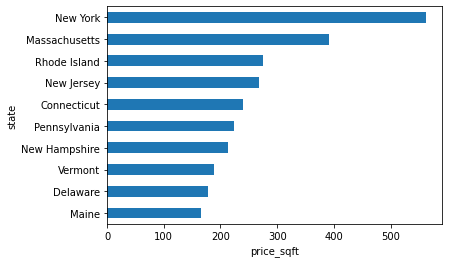

In [18]:
# Comparing states by price per square foot
real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values().plot(kind='barh');
plt.xlabel('price_sqft');

The state with the lowest price per square foot, meaning the state where you pay the least for a square foot of space, is Maine. Following by Deleware, Vermont, New Hampshire and Pennsylvania.

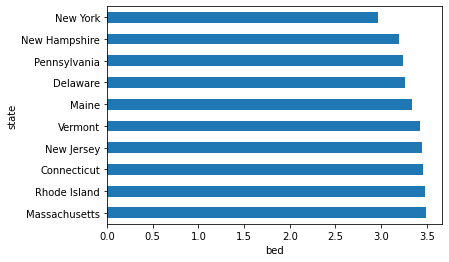

In [19]:
# Comparing states by bedrooms
real_estate_data_copy.groupby('state')['bed'].agg(np.mean).round(2).sort_values(ascending=False).plot(kind='barh');
plt.xlabel('bed');

The state that has the highest average of bedrooms in a house is Massachusetts. Followed by Rhode Island, Conneticut, New Jersey and Vermont.

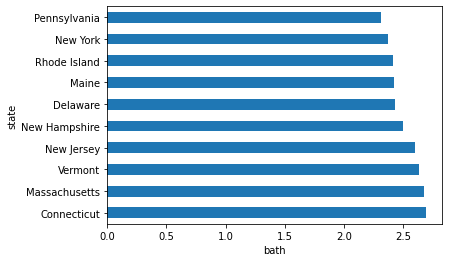

In [20]:
# Comparing states by bathrooms
real_estate_data_copy.groupby('state')['bath'].agg(np.mean).round(2).sort_values(ascending=False).plot(kind='barh');
plt.xlabel('bath');

The state that has the highest average of bathrooms in a house is Connecticut. Followed by Massachusetts, Vermont, New Jersey and New Hampshire.

In [21]:
# create dataframe with the rankings of all 10 states in each category
# find average using groupby and make into list 
a = real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True).index.tolist()
b = real_estate_data_copy.groupby('state')['bed'].agg(np.mean).round(2).sort_values(ascending = False).index.tolist()
c = real_estate_data_copy.groupby('state')['bath'].agg(np.mean).round(2).sort_values(ascending = False).index.tolist()
# combine data
data = a,b,c
# transpose into columns 
df = pd.DataFrame(data).transpose()
# rename columns 
df.rename(columns = {0:'price_sqft', 1:'bed', 2:'bath'}, inplace = True)

df

,price_sqft,bed,bath
0,Maine,Massachusetts,Connecticut
1,Delaware,Rhode Island,Massachusetts
2,Vermont,Connecticut,Vermont
3,New Hampshire,New Jersey,New Jersey
4,Pennsylvania,Vermont,New Hampshire
5,Connecticut,Maine,Delaware
6,New Jersey,Delaware,Maine
7,Rhode Island,Pennsylvania,Rhode Island
8,Massachusetts,New Hampshire,New York
9,New York,New York,Pennsylvania


Observations: 
*   New York is the last in both the price per square foot and bedroom categories. New York is also second to last in bathrooms. 
*   No state falls in the top 5 of more than 2 categories. 

# SECTION 3: Analyze cities in the Northeast

Let's check to see how many cities are in each state.

In [22]:
# number of cities in each state
real_estate_data_copy.groupby('state')['city'].nunique().sort_values()

state
Delaware          18
Rhode Island      39
Pennsylvania     147
Connecticut      176
New Hampshire    232
Vermont          241
Massachusetts    412
New York         475
Maine            523
New Jersey       759
Name: city, dtype: int64

Below is function where you can input a state and get the best cities based on different features.

In [23]:
# comparing city price per sqft in the top five price per sqft states 
def city_barchart(state,feature):
  '''
  This function takes a state and a house feature then returns 
  a horizontal bar chart of the top ten cities by the average of given feature.
  The function is only considering all data in the 
  real_estate_data_copy dataframe.

  ARGUMENTS
  ---------
   - state: (string) must be state abbreviation
   - feature: (string) must be a house feature within dataset
  OUTPUT
  ---------
   - horizontal barchart of feature with top ten cities
  '''
  # create new df with only data from specific state
  state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == state]
  # check if feature is price per sqft
  if feature == 'price_sqft':
    plt.xlabel(feature)
    # make ascending True because we want lowest values 
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = True)[:10].plot(kind='barh');
  else:
    plt.xlabel(feature)
    # make ascending False because we want highest values 
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = False)[:10].plot(kind='barh');

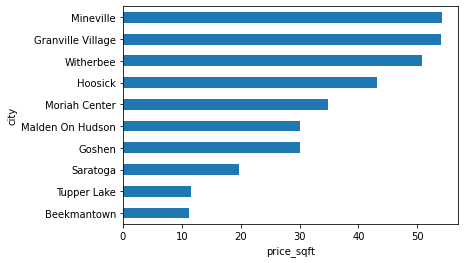

In [24]:
# top 10 NY cities by average price per square foot
city_barchart('NY','price_sqft');

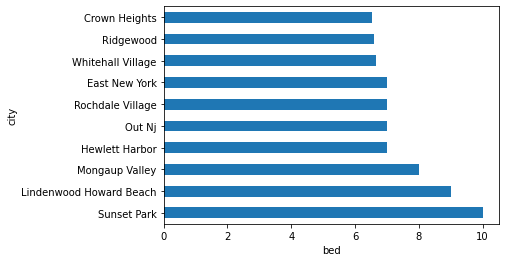

In [25]:
# top 10 NY cities by average number of bedrooms 
city_barchart('NY','bed');

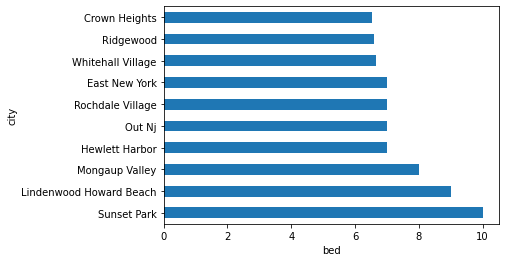

In [26]:
# top 10 NY cities by average number of bathrooms 
city_barchart('NY','bed');

Although the bar charts are a good visual of the top ten cities, let's use the funtion below to see which cities rank in the top 100 in all three categories.

In [27]:
# best price per sqft, bed and bath given state
def city_finder(state, rank):
   '''
  This function takes a state and rank then returns which cities are 
  in the top (rank) of lowest average price per square foot, 
  highest average number of bedrooms and highest average number of bathrooms

  ARGUMENTS
  ---------
   - state: (string) must be state abbreviation 
   - rank: (int) the higher the rank the more likely you will find 
   common elements, however be aware of number of cities in given state
  OUTPUT
  ---------
   - common_elements: (list) list of cities that fell into top (rank) 
   of all three features
  '''
  # create new df with only data from specific state
  state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == state]
  # find top 10 cities by average of different feature using groupby, convert to list 
  a = state_data.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:rank].index.tolist() # ascending True to get lowest values
  b = state_data.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:rank].index.tolist()       # ascending False to get highest values
  c = state_data.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:rank].index.tolist()      # ascending False to get highest values
  # Find common elements in all three lists
  common_elements = list(set.intersection(*map(set, [ a, b, c])))
  # check if anything was found 
  if len(common_elements) == 0:
    return 'Nothing found'
  else:
    return common_elements

city_finder('NY', 100)

['Whitehall Village', 'White Lake']

The cities of White Lake and Whitehall Village are the cities in New York where the average house as a lower price per square foot but with an above average number of bedrooms and bathrooms. 

# SECTION 4: Find our client the best place for them to find a home

Client Information:
*   Two adults and two kids 
*   They want atleast three bathrooms and three bedrooms
*   They have a budget of $1,000,000

Let's sort our data to stay within the client's budget of $1,000,000.

In [28]:
# creat sub df with only listings that are within client's budget
client_df = real_estate_data_copy[real_estate_data_copy['price'] <= 1000000]

Let's see where the states rank within our clients budget.

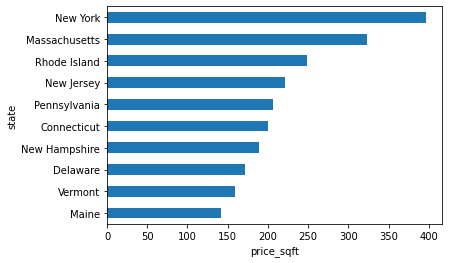

In [29]:
# loook at best states by average price per square foot, within client's budget
client_df.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values().plot(kind='barh');
plt.xlabel('price_sqft');

The states by price per square foot is similar with or without the clients budget. 

Let's choose Maine as our client's state. Now we will look for the cities with the highest average number of bedrooms and bathrooms.

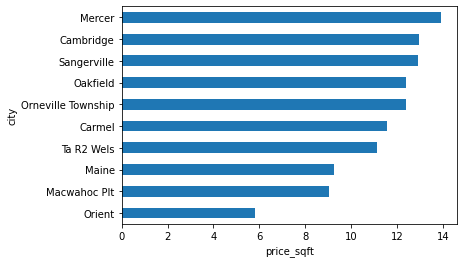

In [30]:
# use city_barchart function from section 3 but update to use budget df
# comparing city price per sqft in the top five price per sqft states 
def city_barchart_client(state,feature):
  '''
  This function takes a state and a house feature then returns 
  a horizontal bar chart of the top ten cities by the average of given feature.
  The function is only considering data with the budget 
  of the client in client_df.

  ARGUMENTS
  ---------
   - state: (string) must be state abbreviation
   - feature: (string) must be a house feature within dataset
  OUTPUT
  ---------
   - horizontal barchart of feature with top ten cities
  '''
  # create new df with only data from specific state
  state_data = client_df[client_df['state_abbrev'] == state]
  # check if feature is price per sqft
  if feature == 'price_sqft':
    plt.xlabel(feature)
    # make ascending True because we want lowest values 
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = True)[:10].plot(kind='barh');
  else:
    plt.xlabel(feature)
    # make ascending False because we want highest values
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = False)[:10].plot(kind='barh');

city_barchart_client('ME','price_sqft');

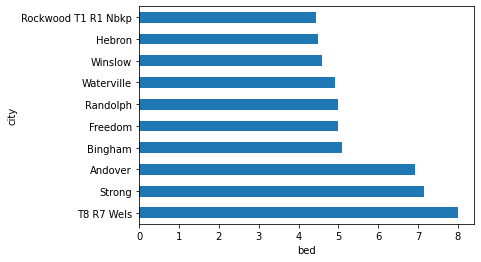

In [31]:
city_barchart_client('ME','bed');

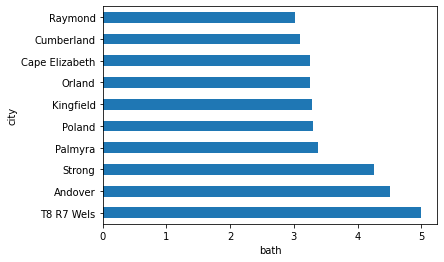

In [32]:
city_barchart_client('ME','bath');

Let's use our city_finder function to find a city that falls in the top ten of price per square foot, number of bedrooms and number of bathrooms.

Let's first check how many cities there are in Maine.

In [33]:
client_df.groupby('state')['city'].nunique().sort_values()

state
Delaware          17
Rhode Island      39
Pennsylvania     146
Connecticut      175
New Hampshire    229
Vermont          240
Massachusetts    404
New York         444
Maine            516
New Jersey       752
Name: city, dtype: int64

There are 516 cities. So let's see which cities are in the top 100.

In [34]:
# best price per sqft, bed and bath given state but use client_df with client's budget
def city_finder_client(state,rank):
  '''
  This function takes a city and rank then returns which cities are 
  in the top (rank) of lowest average price per square foot, 
  highest average number of bedrooms and highest average number of bathrooms

  ARGUMENTS
  ---------
   - state: (string) must be state abbreviation 
   - rank: (int) the higher the rank the more likely you will find 
   common elements, however be aware of number of cities in given state
  OUTPUT
  ---------
   - common_elements: (list) list of cities that fell into top (rank) 
   of all three features

  '''
  # create new df with only data from specific state
  state_data = client_df[client_df['state_abbrev'] == state]
  # find top 10 cities by average of different feature using groupby, convert to list 
  a = state_data.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:rank].index.tolist()
  b = state_data.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:rank].index.tolist()
  c = state_data.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:rank].index.tolist()
  # Find common elements in all three lists
  common_elements = list(set.intersection(*map(set, [ a, b, c])))
  # check if anything was found 
  if len(common_elements) == 0:
    return 'Nothing found'
  else:
    return common_elements

city_finder_client('ME',100)

['T8 R7 Wels', 'Brooksville', 'East Machias', 'Strong']

Let's plot these four cities by price per square foot and bedrooms then by bathrooms.

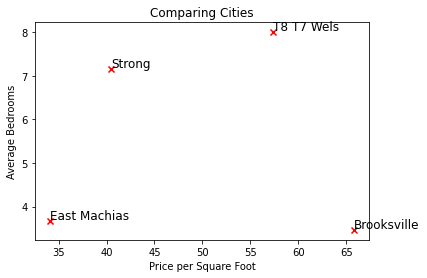

In [35]:
def plot_it_bed(state,city):
  '''
  This function takes a state and city and returns the 
  average price per square foot and average number of bedrooms of city
  
  ARGUMENTS
  -----------
   - state: (string) must be state abbreviation
   - city: (string)
  OUPTUT
  -----------
   - city average price per square foot, city average number of bedrooms
  '''
  # create new df with only data from specific state
  state_data = client_df[client_df['state_abbrev'] == state]
  # create new df with only data from specific city
  city_data = state_data[state_data['city'] == city]
  # return the average price per suqare foot and average bedrooms of specific city
  return city_data['price_sqft'].mean(), city_data['bed'].mean()

def plot_embeddings(data_points, data_to_names, city_names):
    '''
    This function take city names and values returned from plot_it funcition 
    creates a scatter plot of given cordinates 
    and adds names over plot points

    ARGUMENTS
    -----------
    - data_points: (array) list of cordinates
    - data_to_names: (dictionary) key: city value: place in data_points array
    - city_names: (list) list of city names in same order as array and dictionary
    OUPTUT
    -----------
    - scatter plot of cordinates given with city names of data points 
    '''
    # loop through cities in list of cities
    for name in city_names:
        # assign x, y cordinates 
        x, y = data_points[data_to_names[name]]
        # make scatter plot
        plt.scatter(x, y, marker='x', color='red')
        # add city name as text
        plt.text(x+.02, y+.04, name, fontsize=12)
        # add chart labels 
        plt.title("Comparing Cities")
        plt.xlabel("Price per Square Foot")
        plt.ylabel("Average Bedrooms")
    plt.show()

data_points = np.array([plot_it_bed('ME','East Machias'), plot_it_bed('ME','T8 R7 Wels'), plot_it_bed('ME','Strong'), plot_it_bed('ME','Brooksville')])
data_to_names = {'East Machias': 0, 'T8 T7 Wels': 1, 'Strong': 2, 'Brooksville': 3}
city_names = ['East Machias', 'T8 T7 Wels', 'Strong', 'Brooksville']
plot_embeddings(data_points, data_to_names, city_names)

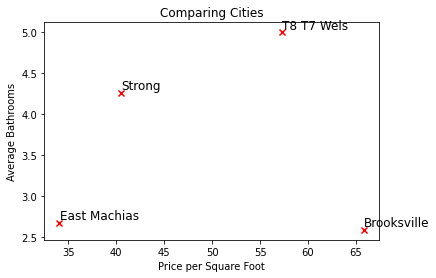

In [36]:
def plot_it_bath(state,city):
  '''
  This function takes a state and city and returns the 
  average price per square foot and average number of bathrooms of city

  ARGUMENTS
  -----------
   - state: (string) must be state abbreviation
   - city: (string)
  OUPTUT
  -----------
   - city average price per square foot, city average number of bathrooms
  '''
  # create new df with only data from specific state
  state_data = client_df[client_df['state_abbrev'] == state]
  # create new df with only data from specific city
  city_data = state_data[state_data['city'] == city]
  # return the average price per suqare foot and average bathrooms of specific city
  return city_data['price_sqft'].mean(), city_data['bath'].mean()

def plot_embeddings(data_points, data_to_names, city_names):
    '''
    This function take city names and values returned from plot_it funcition 
    creates a scatter plot of given cordinates 
    and adds names over plot points

    ARGUMENTS
    -----------
    - data_points: (array) list of cordinates
    - data_to_names: (dictionary) key: city value: place in data_points array
    - city_names: (list) list of city names in same order as array and dictionary
    OUPTUT
    -----------
    - scatter plot of cordinates given with city names of data points 
    '''
    # loop through cities in list of cities 
    for name in city_names:
        # assign x, y cordinates 
        x, y = data_points[data_to_names[name]]
        # make scatter plot
        plt.scatter(x, y, marker='x', color='red')
        # add city name as text
        plt.text(x+.02, y+.04, name, fontsize=12)
        # add chart labels 
        plt.title("Comparing Cities")
        plt.xlabel("Price per Square Foot")
        plt.ylabel("Average Bathrooms")
    plt.show()

data_points = np.array([plot_it_bath('ME','East Machias'), plot_it_bath('ME','T8 R7 Wels'), plot_it_bath('ME','Strong'), plot_it_bath('ME','Brooksville')])
data_to_names = {'East Machias': 0, 'T8 T7 Wels': 1, 'Strong': 2, 'Brooksville': 3}
city_names = ['East Machias', 'T8 T7 Wels', 'Strong', 'Brooksville']
plot_embeddings(data_points, data_to_names, city_names)

Conclusion:

We believe our client, the family of four, should look for a home in East Machias. East Machias has an average of around 3 bedrooms and 2.5 bathrooms. This along with $35 per square foot makes the average home in East Machias within their budget and meets the criteria they wanted for their new home. 

# SECTION 5: Lessons Learned & Next Steps 

Lessons Learned:
*  Cleaning the data was definitely the most time consuming part of our project, from this we learned 
    *   Making sure that you have sufficient data across all sections of a cross-sectional data analysis
    *   Checking for outliers early on to avoid skewed results 

Next Steps:
*  Finding more data to expand analysis beyond just the Northeastern United States 
*  Doing a time series data analysis on the housing sales in US

